In [12]:
# import libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import dataset

df = pd.read_csv("College_Event_Dataset.csv")
print("Raw Dataset Shape:", df.shape)

Raw Dataset Shape: (7000, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EventID          7000 non-null   int64  
 1   EventName        7000 non-null   object 
 2   EventType        7000 non-null   object 
 3   Department       6769 non-null   object 
 4   DayOfWeek        7000 non-null   object 
 5   Season           7000 non-null   object 
 6   TimeOfDay        7000 non-null   object 
 7   VenueCapacity    7000 non-null   int64  
 8   Attendance       7000 non-null   int64  
 9   AttendanceLevel  7000 non-null   object 
 10  FeedbackScore    6867 non-null   float64
 11  EngagementIndex  7000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 656.4+ KB


In [6]:
df.duplicated().sum()

np.int64(712)

In [7]:
df.drop_duplicates(inplace=True)
print("After Removing Duplicates:", df.shape)

After Removing Duplicates: (6288, 12)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6288 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EventID          6288 non-null   int64  
 1   EventName        6288 non-null   object 
 2   EventType        6288 non-null   object 
 3   Department       6078 non-null   object 
 4   DayOfWeek        6288 non-null   object 
 5   Season           6288 non-null   object 
 6   TimeOfDay        6288 non-null   object 
 7   VenueCapacity    6288 non-null   int64  
 8   Attendance       6288 non-null   int64  
 9   AttendanceLevel  6288 non-null   object 
 10  FeedbackScore    6178 non-null   float64
 11  EngagementIndex  6288 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 638.6+ KB


In [9]:
# finding missing values 

df.isnull().sum()

EventID              0
EventName            0
EventType            0
Department         210
DayOfWeek            0
Season               0
TimeOfDay            0
VenueCapacity        0
Attendance           0
AttendanceLevel      0
FeedbackScore      110
EngagementIndex      0
dtype: int64

In [10]:
# Step 3: Handle Missing Values
# -------------------------
# Fill Department with 'Unknown'
if 'Department' in df.columns:
    df['Department'] = df['Department'].fillna("Unknown")

# Fill FeedbackScore with median if available
if 'FeedbackScore' in df.columns:
    df['FeedbackScore'] = df['FeedbackScore'].fillna(df['FeedbackScore'].median())

print("Remaining Nulls:\n", df.isnull().sum())

Remaining Nulls:
 EventID            0
EventName          0
EventType          0
Department         0
DayOfWeek          0
Season             0
TimeOfDay          0
VenueCapacity      0
Attendance         0
AttendanceLevel    0
FeedbackScore      0
EngagementIndex    0
dtype: int64



Class Distribution (AttendanceLevel):
AttendanceLevel
High      33.699109
Medium    33.365140
Low       32.935751
Name: proportion, dtype: float64


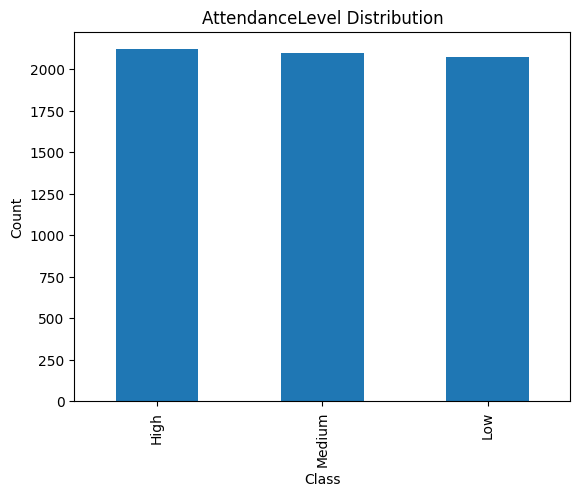

In [13]:
# Step 4: Check Balance of AttendanceLevel
# -------------------------
if 'AttendanceLevel' in df.columns:
    print("\nClass Distribution (AttendanceLevel):")
    print(df['AttendanceLevel'].value_counts(normalize=True) * 100)

    df['AttendanceLevel'].value_counts().plot(kind="bar")
    plt.title("AttendanceLevel Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

In [14]:
# Step 5: Save Cleaned Dataset

df.to_csv("Cleaned_College_Event_Dataset.csv", index=False)
print("✅ Cleaned dataset saved ")

✅ Cleaned dataset saved 
